# 9.1 矢量回测

两种回测框架：

**《矢量回测》**

- 近似Excel 回测
- 以矢量化的方式处理数据，同时处理多个数据点。
- 优点：回测速度块


**《事件回测》**

- 基于事件触发的策略测试方法。能更好地模拟实时交易环境，细化每个事件触发时采取实际的交易操作。
- 聚宽、ptrade、QMT、掘金；模拟交易、实盘交易

In [40]:
import pandas as pd
import numpy as np
data = get_price(security = '510300.XSHG', count=1000, 
               end_date='2020-12-31', frequency='daily', 
               fields=[ 'close'])
data.head()

,close
2016-11-25,3.159
2016-11-28,3.173
2016-11-29,3.198
2016-11-30,3.169
2016-12-01,3.199


## 9.1.1 计算收益率

In [41]:
data['return'] = data['close'].pct_change()
data['comp_return'] = (1 + data['return']).cumprod()
data.tail()

,close,return,comp_return
2020-12-25,4.792,0.008205,1.516936
2020-12-28,4.805,0.002713,1.521051
2020-12-29,4.790,-0.003122,1.516303
2020-12-30,4.850,0.012526,1.535296
2020-12-31,4.953,0.021237,1.567901


## 9.1.2 计算技术指标及信号

In [43]:
data['sma'] =  data['close'].rolling(window = 5).mean()
data['lma'] =  data['close'].rolling(window = 10).mean()
data['signal'] = data.apply(lambda x: 1 if x.sma > x.lma
                           else (-1 if x.sma < x.lma else 0)
                           , axis = 1)
data.tail()

,close,return,comp_return,sma,lma,signal
2020-12-25,4.792,0.008205,1.516936,4.7600,4.7400,1
2020-12-28,4.805,0.002713,1.521051,4.7636,4.7523,1
2020-12-29,4.790,-0.003122,1.516303,4.7786,4.7617,1
2020-12-30,4.850,0.012526,1.535296,4.7980,4.7762,1
2020-12-31,4.953,0.021237,1.567901,4.8380,4.7943,1


## 9.1.3 计算日收益率

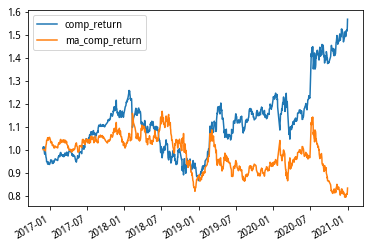

In [45]:
data['ma_comp_return'] = (1 + data['signal'].shift(1) * data['return']).cumprod()
data[['comp_return','ma_comp_return']].plot()
